<a href="https://colab.research.google.com/github/ZestyZeeshan/ML-X/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

# Import necessary libraries

In [18]:
import numpy as np # for numerical data and arrays
import matplotlib.pyplot as plt # for visualizing data
import pandas as pd # for loading dataset and creating dataframe

Read Data from local drive for further analysis.
To upload the file from the local drive write the following code in the cell and run it.

In [19]:
from google.colab import files


uploaded = files.upload()

Saving video games.csv to video games (1).csv


Click on “choose files”, then select and download the CSV file from your local drive.  Later write the following code snippet to import it into a pandas dataframe.



In [22]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['video games (1).csv']))
print(df)


        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

# Load the dataset

In [23]:
#df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [25]:
df.shape # Shape of dataset

(16598, 11)

# Begin Analysis

Let us check for null values first.

In [26]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Year and publisher seem to have null values.

In [27]:
df = df.dropna(how='any',axis=0)

We removed null values how we can see that our data is more clean.

In [28]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Let us also get more information about the columns like datatypes

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


For the numeric datatypes, we can get some useful stats which will help us analyse the data better.

In [30]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


So, from the above table we see that the data is from year 1980 to 2020.
Also, we see the stats region-wise (NA, EU, JP, Other) as well as the global sales. NA sales seem to be the highest and JP is the lowest.

We saw some null values before. We can impute the null values and fill them. It won't be 100% accurate but it will be a good approximation for us to work with. Since the null values were in the year and Publisher, we can use mode to impute the null values.
<br>
Let us save it to a new dataframe.

In [31]:
df1 = df.copy()
df1.Year = df1.Year.fillna(df1.Year.mode()[0])
df1.Publisher =df1.Publisher.fillna(df1.Publisher.mode()[0])

In [32]:
df1.isnull().sum() # Checking for null values again

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Visualizations

Let us see which genre had the most sales.

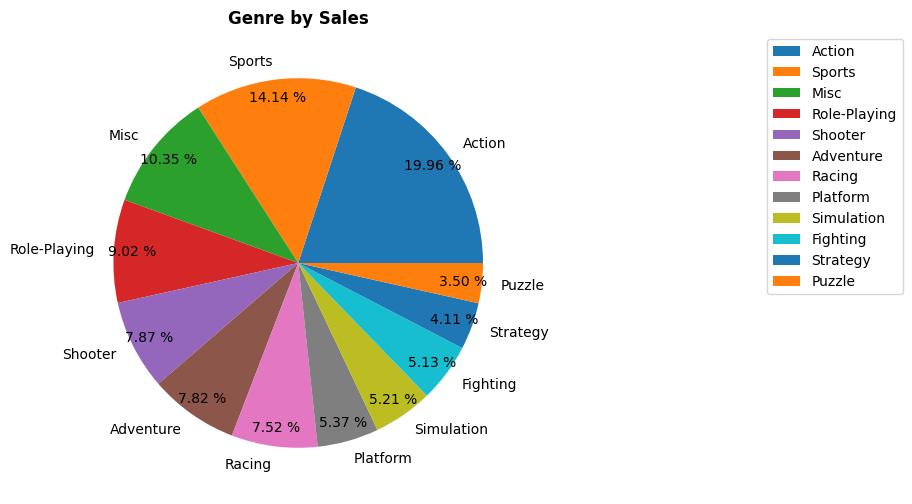

In [33]:
genre = df1.Genre.value_counts().values
labels =df1.Genre.value_counts().index
plt.figure(figsize=(6, 6))
plt.title('Genre by Sales',fontdict={'fontweight':'bold'})
plt.pie(genre,labels=labels,autopct='%.2f %%',pctdistance=0.9)
plt.legend(bbox_to_anchor=(1.5,1.0),loc='upper left')
plt.show()

<b> Action </b> seems to have highest sales followed by <b> Sports </b>. <b>Puzzle</b> is the least sold genre.

Let us now visualize the top 10 years of sales.

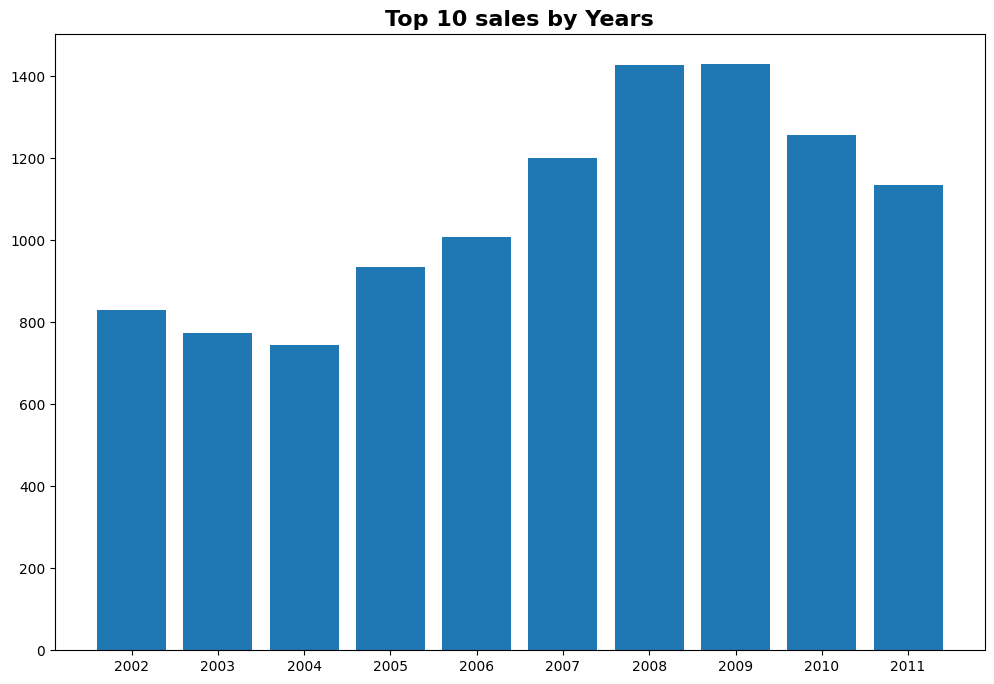

In [34]:
year= df1.Year.value_counts().head(10)
plt.figure(figsize=(12,8))

plt.xticks(year.index)
plt.title('Top 10 sales by Years',fontdict={'fontweight':'bold','fontsize':16})

plt.bar(year.index,year.values)
plt.show()

Year <b> 2009 </b> seems to have the highest sales.

Now let us see which platform / console made the highest sales.

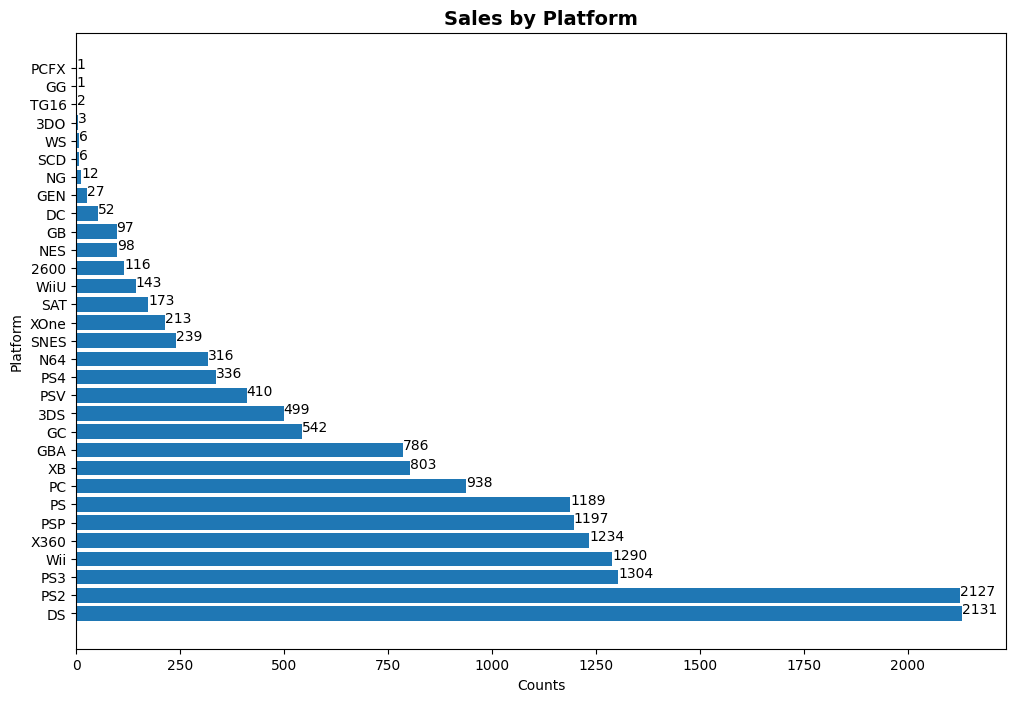

In [35]:
platform = df1.Platform.value_counts()
plt.figure(figsize=(12,8))

plt.barh(platform.index,platform.values)

for i,v in enumerate(platform.values):
    plt.text(v,i,str(v))

plt.title('Sales by Platform',fontdict={'fontweight':'bold','fontsize':'14'})
plt.xlabel('Counts')
plt.ylabel("Platform")

plt.show()

Nintendo <b> DS </b> is in the lead with Sony's <b> PS2 </b> right behind it.

Let us now visualize the sales by countries.

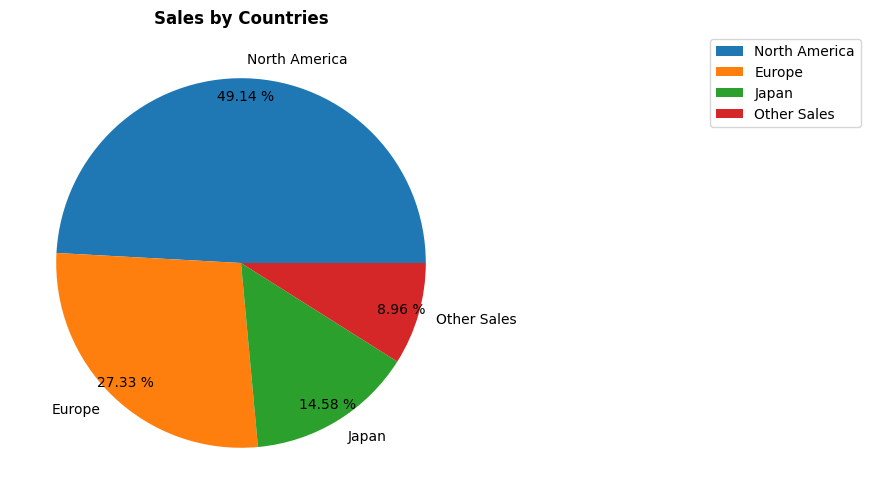

In [36]:
a = df1.NA_Sales.sum().round()
b = df1.EU_Sales.sum().round()
c = df1.JP_Sales.sum().round()
d = df1.Other_Sales.sum().round()
e = df1.Global_Sales.sum().round()
values = [a,b,c,d]
labels=['North America','Europe','Japan','Other Sales']

plt.figure(figsize=(6, 6))
plt.title('Sales by Countries',fontdict={'fontweight':'bold'})
plt.pie(values,labels=labels,autopct='%.2f %%',pctdistance=0.9)
plt.legend(bbox_to_anchor=(1.5,1.0),loc='upper left')
plt.show()

<b> NA </b> is clearly in the lead with almost 50% sales recorded.

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

Most genre at all

In [56]:

!pip install seaborn

In [47]:
import plotly.graph_objects as go

x = ["NA_Sales","EU_Sales","JP_Sales",'Other_Sales','Global_Sales']
y = [df1['NA_Sales'].max(),df1['EU_Sales'].max(),df1['JP_Sales'].max(),df1['Other_Sales'].max() ,df1['Global_Sales'].max()]
labels = ['Wii Sports	','Wii Sports	', 'Pokemon Red/Pokemon Blue', 'Grand Theft Auto: San Andreas	', 'Wii Sports	']
colors = ["palette"[i] for i in range(len(x))]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc='max', y=y, x=x, text=labels, marker_color=c ))



fig.show()

In [48]:
r=df1.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)
r=r.reset_index()
r

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


In [50]:
import seaborn as sns


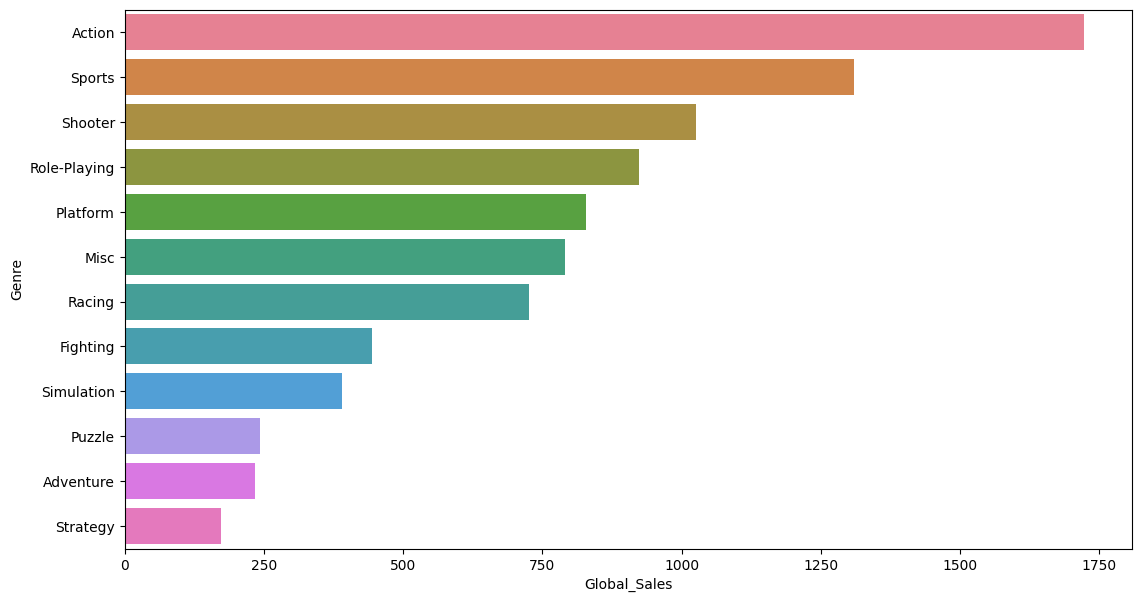

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))
sns.barplot(data=r, x='Global_Sales', y='Genre', palette='husl')
plt.show()
